In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os
import sys

In [6]:
import seaborn as sns
sns.set_style('white')
sns.set_palette('colorblind')

In [21]:
from imp import reload
import read_annotations
reload(read_annotations);

### Find files to compare

Find pairs of files annotated for more than one annotator.

In [25]:
document_pairs, all_files = read_annotations.get_annotated_documents()
all_files.values()

dict_values([Case: ALKASI v. TURKEY - Ann: L, Case: ALKASI v. TURKEY - Ann: M, Case: ALKASI v. TURKEY - Ann: S])

In [10]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [11]:
STYLES = {'claim': '__', 'major-claim': '***', 'premise': '`'}

In [12]:
print(document_pairs[0][0].identifier)
printmd(document_pairs[0][0].sample_labeled_text(limit=35, styles=STYLES))
printmd('---')
print(document_pairs[0][1].identifier)
printmd(document_pairs[0][1].sample_labeled_text(limit=35, styles=STYLES))

Case: ALKASI v. TURKEY - Ann: L


`Relying` `on` `Article` `6` `of` `the` `Convention` , the applicant complains that ***the*** ***labour*** ***court*** ***’*** ***s*** ***dismissal*** ***of*** ***her*** ***claim*** ***for*** ***compensation*** ***against*** ***her*** ***former*** ***employer*** ***amounted*** ***to*** ***a*** ***violation*** ***of*** ***her*** ***right*** ***to*** ***be*** ***presumed*** ***innocent*** , in that __the__ __labour__ __court__ __found__ __that__ __she__ __had__ __broken__ __her__ __employer__ __’__ __s__ __trust__ __by__ __committing__ __the__ offence __of__ __incitement__ . 

The applicant argues that __the__ __labour__ __court__ __’__ __s__ __complete__ __disregard__ __of__ __her__ __acquittal__ __in__ __relation__ __to__ __the__ __charge__ __of__ __incitement__ __is__ __incompatible__ __with__ __the__ __requirements__ __of__ __Article__ __6__ __§__ __2__ __of__ __the__ __Convention__ . 

She further claims that __the__ __Bakırköy__ __Labour__ __Court__ __based__ __its__ __decision__ on __self-incriminating__ __statements__ __which__ __she__ __had__ __given__ __to__ __the__ __police__ __in__ __the__ __absence__ __of__ __her__ __lawyer__ . 

Being the master of the characterisation to be given in law to the facts of the case , the Court considers that ***the*** ***applicant*** ***’*** ***s*** ***grievances*** ***fall*** ***to*** ***be*** ***examined*** ***solely*** ***under*** ***Article*** ***6*** ***§*** ***2*** ***of*** ***the*** ***Convention*** which reads as follows : 



---

Case: ALKASI v. TURKEY - Ann: M


Relying on Article 6 of the Convention , the applicant complains that __the__ __labour__ __court__ __’__ __s__ __dismissal__ __of__ __her__ __claim__ __for__ __compensation__ __against__ __her__ __former__ __employer__ __amounted__ __to__ __a__ __violation__ __of__ __her__ __right__ __to__ __be__ __presumed__ __innocent__ , in that `the` `labour` `court` `found` `that` `she` `had` `broken` `her` `employer` `’` `s` `trust` `by` `committing` `the` offence `of` `incitement` . 

The applicant argues that ***the*** ***labour*** ***court*** ***’*** ***s*** ***complete*** ***disregard*** ***of*** ***her*** ***acquittal*** ***in*** ***relation*** ***to*** ***the*** ***charge*** ***of*** ***incitement*** ***is*** ***incompatible*** ***with*** ***the*** ***requirements*** ***of*** ***Article*** ***6*** ***§*** ***2*** ***of*** ***the*** ***Convention*** . 

She further claims that __the__ __Bakırköy__ __Labour__ __Court__ __based__ __its__ __decision__ on __self-incriminating__ __statements__ __which__ __she__ __had__ __given__ __to__ __the__ __police__ __in__ __the__ __absence__ __of__ __her__ __lawyer__ . 

Being the master of the characterisation to be given in law to the facts of the case , the Court considers that __the__ __applicant__ __’__ __s__ __grievances__ __fall__ __to__ __be__ __examined__ __solely__ __under__ __Article__ __6__ __§__ __2__ __of__ __the__ __Convention__ which reads as follows : 



# Inter annotator agreement

In [14]:
import show_metrics
reload(show_metrics);

## Sentence level comparison

We compare the agreement on classifying argumentative vs non argumentative sentences

Krippendorff Alpha: 0.6142413720538721
Fleiss Kappa: -0.0014715500327011834
Kohen-'s Kappa Ann: L - Ann: M: 0.5070422535211268
Observed Agreement: 78.57%


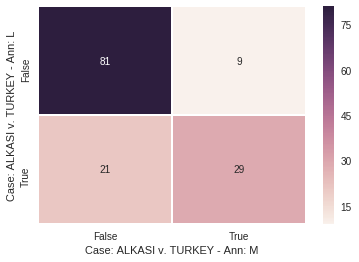

Kohen-'s Kappa Ann: L - Ann: S: 0.7442922374429224
Observed Agreement: 88.57%


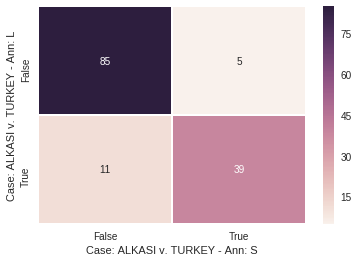

Kohen-'s Kappa Ann: M - Ann: S: 0.5870206489675516
Observed Agreement: 82.86%


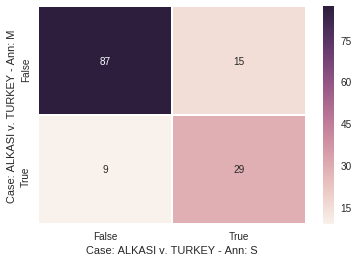

In [26]:
def get_argumentative_sentences(document):
    return [sentence.has_label for sentence in document.sentences]

show_metrics.show_krippendorff_alpha([get_argumentative_sentences(doc)
                                      for doc in all_files.values()])
show_metrics.show_fleiss_kappa([get_argumentative_sentences(doc)
                                      for doc in all_files.values()])
for doc1, doc2 in document_pairs:
    labels1 = get_argumentative_sentences(doc1)
    labels2 = get_argumentative_sentences(doc2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

----
## Token level comparison

### Identification

Kappa agreement using labels `Args` vs `Non-Arg`.

Krippendorff Alpha: 0.4148501941371211
Fleiss Kappa: 0.019651716049408286
Kohen-'s Kappa Ann: L - Ann: M: 0.29119744770611533
Observed Agreement: 64.15%


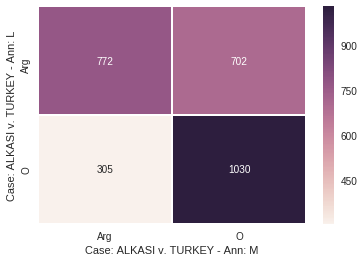

Kohen-'s Kappa Ann: L - Ann: S: 0.5318223201446681
Observed Agreement: 76.29%


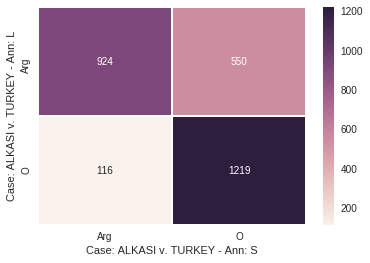

Kohen-'s Kappa Ann: M - Ann: S: 0.43994201526888077
Observed Agreement: 73.69%


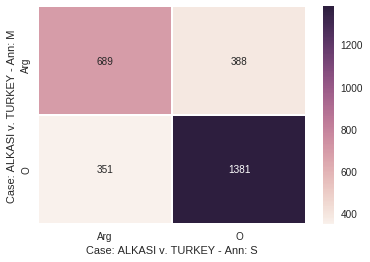

In [39]:
def get_argumentative_words(labels):
    return ['Arg' if x != 'O' else 'O' for x in labels]

show_metrics.show_krippendorff_alpha(
    [get_argumentative_words(doc.get_word_label_list()[1]) for doc in all_files.values()])
show_metrics.show_fleiss_kappa(
    [get_argumentative_words(doc.get_word_label_list()[1]) for doc in all_files.values()])

for doc1, doc2 in document_pairs:
    labels1, labels2 = read_annotations.get_labels(doc1, doc2)
    labels1 = get_argumentative_words(labels1)
    labels2 = get_argumentative_words(labels2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

----
### Classification

Kappa agreement using labels `claim`, `major-claim` and `premise`

Fleiss Kappa: 0.0018815230934347376
Kohen-'s Kappa Ann: L - Ann: M: 0.2298394927743188
Observed Agreement: 51.30%


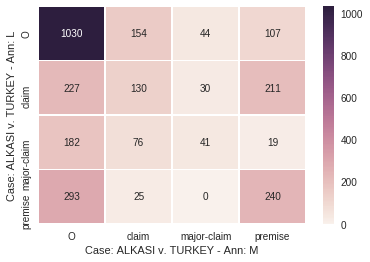

Kohen-'s Kappa Ann: L - Ann: S: 0.3315330106981368
Observed Agreement: 57.89%


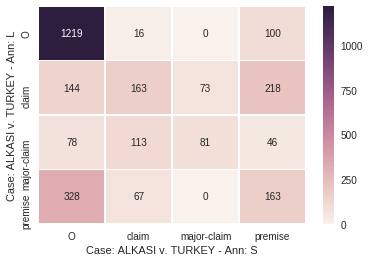

Kohen-'s Kappa Ann: M - Ann: S: 0.408810212320016
Observed Agreement: 67.28%


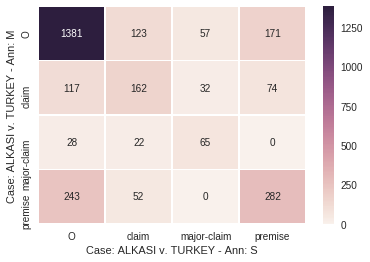

In [28]:
# show_metrics.show_krippendorff_alpha(
#     [get_argumentative_words(doc.get_word_label_list()[1]) for doc in all_files.values()],
#     label_names=['Arg', 'O'])
show_metrics.show_fleiss_kappa(
    [doc.get_word_label_list() for doc in all_files.values()])

for doc1, doc2 in document_pairs:
    labels1, labels2 = read_annotations.get_labels(doc1, doc2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

Kappa agreement using only labels `claim` and `premise`

Fleiss Kappa: 0.016342107970600286
Kohen-'s Kappa Ann: L - Ann: M: 0.261204657070897
Observed Agreement: 55.07%


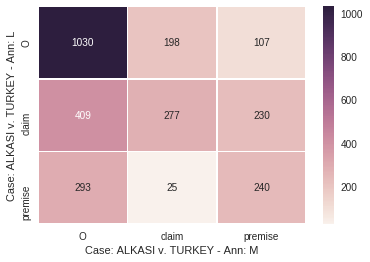

Kohen-'s Kappa Ann: L - Ann: S: 0.4122483783472951
Observed Agreement: 64.51%


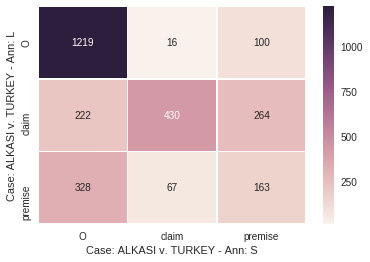

Kohen-'s Kappa Ann: M - Ann: S: 0.43042934425130475
Observed Agreement: 69.21%


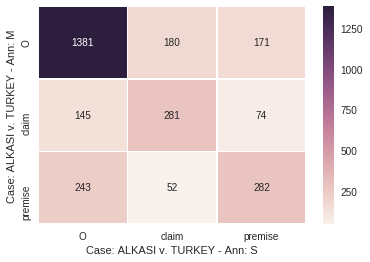

In [30]:
def get_simplified_labels(labels):
    return [x if x != 'major-claim' else 'claim' for x in labels]

# show_metrics.show_krippendorff_alpha(
#     [get_simplified_labels(doc.get_word_label_list()[1]) for doc in all_files.values()],
#     label_names=['Arg', 'O'])
show_metrics.show_fleiss_kappa(
    [get_simplified_labels(doc.get_word_label_list()[1]) for doc in all_files.values()])

for doc1, doc2 in document_pairs:
    labels1, labels2 = read_annotations.get_labels(doc1, doc2)
    labels1 = get_simplified_labels(labels1)
    labels2 = get_simplified_labels(labels2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

## Qualitative error analysis

In [31]:
def sample_sentences(doc1, doc2, label1, label2):
    """Samples sentences where label1 was confused with label2 in
    doc1 and doc2 respectively.
    """
    total_errors = 0
    for sentence1, sentence2 in zip(doc1.sentences, doc2.sentences):
        indices1 = [i for i, x in enumerate(sentence1.labels) if x == label1]
        if len(indices1) == 0:
            continue
        indices2 = [i for i, x in enumerate(sentence2.labels) if x == label2]
        if len(indices2) == 0 or len(set(indices1).intersection(indices2)) == 0:
            continue
        total_errors += len(set(indices1).intersection(indices2))
        # Print both sentences
        printmd(sentence1.pretty_print(styles=STYLES))
        printmd(sentence2.pretty_print(styles=STYLES))
        printmd('---')
    print('TOTAL ERRORS:', total_errors)

Examples labeled as `premise` in one document and as `O` in the other

In [32]:
print(document_pairs[0][0].identifier, document_pairs[0][1].identifier)

Case: ALKASI v. TURKEY - Ann: L Case: ALKASI v. TURKEY - Ann: M


In [41]:
document_pairs

[(Case: ALKASI v. TURKEY - Ann: L, Case: ALKASI v. TURKEY - Ann: M),
 (Case: ALKASI v. TURKEY - Ann: L, Case: ALKASI v. TURKEY - Ann: S),
 (Case: ALKASI v. TURKEY - Ann: M, Case: ALKASI v. TURKEY - Ann: S)]

In [46]:
sample_sentences(document_pairs[0][1], document_pairs[0][0], 'O', 'claim')

Although `she` `had` `retracted` `her` `statements` at a `later` `date` `and` `denied` `having` `committed` `the` `alleged` `offence` , the labour court had established that __the__ __acts__ __of__ __the__ __applicant__ __had__ __breached__ __her__ __employer__ __’__ __s__ __trust__ __and__ __therefore__ __justified__ __her__ __dismissal__ __from__ __her__ __post__ . 

__Although__ __she__ __had__ __retracted__ __her__ __statements__ at a __later__ __date__ __and__ __denied__ __having__ __committed__ __the__ __alleged__ __offence__ , __the__ __labour__ __court__ __had__ __established__ __that__ __the__ __acts__ __of__ __the__ __applicant__ __had__ __breached__ __her__ __employer__ __’__ __s__ __trust__ __and__ __therefore__ __justified__ __her__ __dismissal__ __from__ __her__ __post__ . 

---

In order for the second aspect of Article 6 § 2 to be applicable to subsequent proceedings , the Court requires an applicant to demonstrate the existence of a link between concluded proceedings and subsequent proceedings . 

In order for the second aspect of Article 6 § 2 to be applicable to subsequent proceedings , __the__ __Court__ __requires__ __an__ __applicant__ __to__ __demonstrate__ __the__ __existence__ __of__ __a__ __link__ __between__ __concluded__ __proceedings__ __and__ __subsequent__ __proceedings__ __.__ 

---

__The__ __application__ __is__ __therefore__ __not__ __incompatible__ __ratione__ __materiae__ __with__ __the__ __provisions__ __of__ __the__ __Convention__ . 

__The__ __application__ __is__ __therefore__ __not__ __incompatible__ __ratione__ __materiae__ __with__ __the__ __provisions__ __of__ __the__ __Convention__ __.__ 

---

The Court observes at the outset that the nature of the labour court ’ s task was to assess whether the termination of the applicant ’ s employment had been justified , and whether the applicant should have received notice and severance pay upon termination of her employment contract . 

The Court observes at the outset that __the__ __nature__ __of__ __the__ __labour__ __court__ __’__ __s__ __task__ __was__ __to__ __assess__ __whether__ the __termination__ __of__ __the__ __applicant__ __’__ __s__ __employment__ __had__ __been__ __justified__ __,__ __and__ __whether__ the __applicant__ __should__ __have__ __received__ __notice__ __and__ __severance__ __pay__ __upon__ __termination__ __of__ __her__ __employment__ __contract__ . 

---

In other words , the Bakırköy Labour Court , as a civil court not bound by the findings or result of the criminal proceedings , was at liberty to determine the dispute from a labour law perspective . 

In other words , __the__ __Bakırköy__ __Labour__ __Court__ , as `a` `civil` `court` `not` `bound` `by` `the` `findings` `or` `result` `of` `the` `criminal` `proceedings` , __was__ __at__ __liberty__ __to__ __determine__ __the__ __dispute__ __from__ __a__ __labour__ __law__ __perspective__ . 

---

It could , as a civil court , reach a different conclusion from the criminal courts by establishing independently the facts of the case with regard to the applicant ’ s conduct . 

__It__ __could__ , as `a` `civil` `court` , __reach__ a __different__ __conclusion__ __from__ __the__ __criminal__ __courts__ __by__ __establishing__ __independently__ __the__ __facts__ __of__ __the__ __case__ __with__ __regard__ __to__ __the__ __applicant__ __’__ __s__ __conduct__ . 

---

The Court recalls in that respect that even exoneration from criminal responsibility does not , as such , preclude the establishment of civil or other forms of liability arising out of the same facts on the basis of a less strict burden of proof ( see , for example , Ringvold v. Norway , no . 

The Court recalls in that respect that __even__ __exoneration__ __from__ __criminal__ __responsibility__ __does__ __not__ __,__ __as__ __such__ __,__ __preclude__ __the__ __establishment__ __of__ __civil__ __or__ __other__ __forms__ __of__ __liability__ __arising__ __out__ __of__ __the__ __same__ __facts__ __on__ __the__ __basis__ __of__ __a__ __less__ __strict__ __burden__ __of__ __proof__ `(` `see` `,` `for` `example` `,` `Ringvold` `v.` `Norway` `,` `no` `.` 

---

However , in order to comply with the right guaranteed under Article 6 § 2 of the Convention , the national courts in the subsequent proceedings need to stay within the bounds of a civil forum and refrain from suggesting criminal characterization of the applicant ’ s conduct ( see , inter alia , Teodor v. Romania , no . 

However , `in` `order` `to` `comply` `with` `the` `right` `guaranteed` `under` `Article` `6` `§` `2` `of` `the` `Convention` , __the__ __national__ __courts__ __in__ __the__ __subsequent__ __proceedings__ __need__ __to__ __stay__ __within__ __the__ __bounds__ __of__ __a__ __civil__ __forum__ __and__ __refrain__ __from__ __suggesting__ __criminal__ __characterization__ __of__ __the__ __applicant__ __’__ __s__ __conduct__ `(` `see` `,` `inter` `alia` `,` `Teodor` `v.` `Romania` `,` `no` `.` 

---

The court notes that , `although` `the` `Bakırköy` `Labour` `Court` `was` `empowered` `to` `make` a `fresh` `assessment` `of` `the` `facts` `,` `it` `based` `its` `reasoning` `to` `a` `large` `extent` `on` `the` `criminal` `file` , and `concluded` `that` `the` `applicant` `had` `indeed` `committed` `the` offence `of` `incitement` , when in fact `she` `had` `been` `acquitted` `of` `the` `same` `offence` `by` `the` `criminal` `courts` . 

The court notes that , although __the__ __Bakırköy__ __Labour__ __Court__ __was__ __empowered__ __to__ __make__ a __fresh__ __assessment__ __of__ __the__ __facts__ , __it__ __based__ __its__ __reasoning__ __to__ __a__ __large__ __extent__ __on__ __the__ __criminal__ __file__ , and __concluded__ __that__ __the__ __applicant__ __had__ __indeed__ __committed__ __the__ offence __of__ __incitement__ __,__ __when__ __in__ __fact__ __she__ __had__ __been__ __acquitted__ __of__ __the__ __same__ __offence__ __by__ __the__ __criminal__ __courts__ . 

---

The applicant further claimed that the labour court not only disregarded the final acquittal and found that the applicant had committed the offence of incitement , but that in doing so it also `relied` `on` `the` `self-incriminating` `statements` `given` `by` `the` `applicant` `to` `the` `police` `in` `the` `absence` `of` `her` `lawyer` . 

The applicant further claimed that __the__ __labour__ __court__ __not__ __only__ __disregarded__ __the__ __final__ __acquittal__ __and__ __found__ __that__ __the__ __applicant__ __had__ __committed__ __the__ offence __of__ __incitement__ __,__ __but__ __that__ __in__ __doing__ __so__ __it__ __also__ __relied__ __on__ __the__ __self-incriminating__ __statements__ __given__ __by__ __the__ __applicant__ __to__ __the__ __police__ __in__ __the__ __absence__ __of__ __her__ __lawyer__ . 

---

Thus , the facts of the case seem to indicate that the statements given by the applicant to the police without the assistance of a lawyer were relied on by the labour court , and the Court does not rule out that reliance by a court on such statements in civil proceedings __may__ __raise__ __an__ __issue__ __under__ __Article__ __6__ __§__ __1__ __of__ __the__ __Convention__ . 

Thus , the facts of the case seem to indicate that __the__ __statements__ __given__ __by__ __the__ __applicant__ __to__ __the__ __police__ __without__ __the__ __assistance__ __of__ __a__ __lawyer__ __were__ __relied__ __on__ __by__ __the__ __labour__ __court__ , and the Court does not rule out that reliance by a court on such statements in civil proceedings may raise an issue under Article 6 § 1 of the Convention . 

---

TOTAL ERRORS: 227


In [35]:
sample_sentences(document_pairs[0][0], document_pairs[0][1], 'O', 'premise')

“ Everyone charged with a criminal offence shall be presumed innocent until proved guilty according to law . ” 

`“` `Everyone` `charged` `with` `a` `criminal` `offence` `shall` `be` `presumed` `innocent` `until` `proved` `guilty` `according` `to` `law` . ” 

---

The court notes that , although __the__ __Bakırköy__ __Labour__ __Court__ __was__ __empowered__ __to__ __make__ a __fresh__ __assessment__ __of__ __the__ __facts__ , __it__ __based__ __its__ __reasoning__ __to__ __a__ __large__ __extent__ __on__ __the__ __criminal__ __file__ , and __concluded__ __that__ __the__ __applicant__ __had__ __indeed__ __committed__ __the__ offence __of__ __incitement__ __,__ __when__ __in__ __fact__ __she__ __had__ __been__ __acquitted__ __of__ __the__ __same__ __offence__ __by__ __the__ __criminal__ __courts__ . 

The court notes that , `although` `the` `Bakırköy` `Labour` `Court` `was` `empowered` `to` `make` a `fresh` `assessment` `of` `the` `facts` `,` `it` `based` `its` `reasoning` `to` `a` `large` `extent` `on` `the` `criminal` `file` , and `concluded` `that` `the` `applicant` `had` `indeed` `committed` `the` offence `of` `incitement` , when in fact `she` `had` `been` `acquitted` `of` `the` `same` `offence` `by` `the` `criminal` `courts` . 

---

Article 41 of the Convention provides : 

`Article` `41` `of` `the` `Convention` `provides` `:` 

---

“ If the Court finds that there has been a violation of the Convention or the Protocols thereto , and if the internal law of the High Contracting Party concerned allows only partial reparation to be made , the Court shall , if necessary , afford just satisfaction to the injured party . ” 

`“` `If` `the` `Court` `finds` `that` `there` `has` `been` `a` `violation` `of` `the` `Convention` `or` `the` `Protocols` `thereto` `,` `and` `if` `the` `internal` `law` `of` `the` `High` `Contracting` `Party` `concerned` `allows` `only` `partial` `reparation` `to` `be` `made` `,` `the` `Court` `shall` `,` `if` `necessary` `,` `afford` `just` `satisfaction` `to` `the` `injured` `party` `.` `”` 

---

The applicant claimed 3,500 Turkish liras ( TRL – approximately 1,200 euros ( EUR ) ) plus statutory interest accrued on that sum in respect of pecuniary damage . 

`The` `applicant` `claimed` `3,500` `Turkish` `liras` `(` `TRL` `–` `approximately` `1,200` `euros` `(` `EUR` ) `)` `plus` `statutory` `interest` `accrued` `on` `that` `sum` `in` `respect` `of` `pecuniary` `damage` . 

---

TOTAL ERRORS: 107


In [36]:
sample_sentences(document_pairs[0][0], document_pairs[0][1], 'claim', 'O')

__Although__ __she__ __had__ __retracted__ __her__ __statements__ at a __later__ __date__ __and__ __denied__ __having__ __committed__ __the__ __alleged__ __offence__ , __the__ __labour__ __court__ __had__ __established__ __that__ __the__ __acts__ __of__ __the__ __applicant__ __had__ __breached__ __her__ __employer__ __’__ __s__ __trust__ __and__ __therefore__ __justified__ __her__ __dismissal__ __from__ __her__ __post__ . 

Although `she` `had` `retracted` `her` `statements` at a `later` `date` `and` `denied` `having` `committed` `the` `alleged` `offence` , the labour court had established that __the__ __acts__ __of__ __the__ __applicant__ __had__ __breached__ __her__ __employer__ __’__ __s__ __trust__ __and__ __therefore__ __justified__ __her__ __dismissal__ __from__ __her__ __post__ . 

---

In order for the second aspect of Article 6 § 2 to be applicable to subsequent proceedings , __the__ __Court__ __requires__ __an__ __applicant__ __to__ __demonstrate__ __the__ __existence__ __of__ __a__ __link__ __between__ __concluded__ __proceedings__ __and__ __subsequent__ __proceedings__ __.__ 

In order for the second aspect of Article 6 § 2 to be applicable to subsequent proceedings , the Court requires an applicant to demonstrate the existence of a link between concluded proceedings and subsequent proceedings . 

---

__The__ __application__ __is__ __therefore__ __not__ __incompatible__ __ratione__ __materiae__ __with__ __the__ __provisions__ __of__ __the__ __Convention__ __.__ 

__The__ __application__ __is__ __therefore__ __not__ __incompatible__ __ratione__ __materiae__ __with__ __the__ __provisions__ __of__ __the__ __Convention__ . 

---

The Court observes at the outset that __the__ __nature__ __of__ __the__ __labour__ __court__ __’__ __s__ __task__ __was__ __to__ __assess__ __whether__ the __termination__ __of__ __the__ __applicant__ __’__ __s__ __employment__ __had__ __been__ __justified__ __,__ __and__ __whether__ the __applicant__ __should__ __have__ __received__ __notice__ __and__ __severance__ __pay__ __upon__ __termination__ __of__ __her__ __employment__ __contract__ . 

The Court observes at the outset that the nature of the labour court ’ s task was to assess whether the termination of the applicant ’ s employment had been justified , and whether the applicant should have received notice and severance pay upon termination of her employment contract . 

---

In other words , __the__ __Bakırköy__ __Labour__ __Court__ , as `a` `civil` `court` `not` `bound` `by` `the` `findings` `or` `result` `of` `the` `criminal` `proceedings` , __was__ __at__ __liberty__ __to__ __determine__ __the__ __dispute__ __from__ __a__ __labour__ __law__ __perspective__ . 

In other words , the Bakırköy Labour Court , as a civil court not bound by the findings or result of the criminal proceedings , was at liberty to determine the dispute from a labour law perspective . 

---

__It__ __could__ , as `a` `civil` `court` , __reach__ a __different__ __conclusion__ __from__ __the__ __criminal__ __courts__ __by__ __establishing__ __independently__ __the__ __facts__ __of__ __the__ __case__ __with__ __regard__ __to__ __the__ __applicant__ __’__ __s__ __conduct__ . 

It could , as a civil court , reach a different conclusion from the criminal courts by establishing independently the facts of the case with regard to the applicant ’ s conduct . 

---

The Court recalls in that respect that __even__ __exoneration__ __from__ __criminal__ __responsibility__ __does__ __not__ __,__ __as__ __such__ __,__ __preclude__ __the__ __establishment__ __of__ __civil__ __or__ __other__ __forms__ __of__ __liability__ __arising__ __out__ __of__ __the__ __same__ __facts__ __on__ __the__ __basis__ __of__ __a__ __less__ __strict__ __burden__ __of__ __proof__ `(` `see` `,` `for` `example` `,` `Ringvold` `v.` `Norway` `,` `no` `.` 

The Court recalls in that respect that even exoneration from criminal responsibility does not , as such , preclude the establishment of civil or other forms of liability arising out of the same facts on the basis of a less strict burden of proof ( see , for example , Ringvold v. Norway , no . 

---

However , `in` `order` `to` `comply` `with` `the` `right` `guaranteed` `under` `Article` `6` `§` `2` `of` `the` `Convention` , __the__ __national__ __courts__ __in__ __the__ __subsequent__ __proceedings__ __need__ __to__ __stay__ __within__ __the__ __bounds__ __of__ __a__ __civil__ __forum__ __and__ __refrain__ __from__ __suggesting__ __criminal__ __characterization__ __of__ __the__ __applicant__ __’__ __s__ __conduct__ `(` `see` `,` `inter` `alia` `,` `Teodor` `v.` `Romania` `,` `no` `.` 

However , in order to comply with the right guaranteed under Article 6 § 2 of the Convention , the national courts in the subsequent proceedings need to stay within the bounds of a civil forum and refrain from suggesting criminal characterization of the applicant ’ s conduct ( see , inter alia , Teodor v. Romania , no . 

---

The court notes that , although __the__ __Bakırköy__ __Labour__ __Court__ __was__ __empowered__ __to__ __make__ a __fresh__ __assessment__ __of__ __the__ __facts__ , __it__ __based__ __its__ __reasoning__ __to__ __a__ __large__ __extent__ __on__ __the__ __criminal__ __file__ , and __concluded__ __that__ __the__ __applicant__ __had__ __indeed__ __committed__ __the__ offence __of__ __incitement__ __,__ __when__ __in__ __fact__ __she__ __had__ __been__ __acquitted__ __of__ __the__ __same__ __offence__ __by__ __the__ __criminal__ __courts__ . 

The court notes that , `although` `the` `Bakırköy` `Labour` `Court` `was` `empowered` `to` `make` a `fresh` `assessment` `of` `the` `facts` `,` `it` `based` `its` `reasoning` `to` `a` `large` `extent` `on` `the` `criminal` `file` , and `concluded` `that` `the` `applicant` `had` `indeed` `committed` `the` offence `of` `incitement` , when in fact `she` `had` `been` `acquitted` `of` `the` `same` `offence` `by` `the` `criminal` `courts` . 

---

The applicant further claimed that __the__ __labour__ __court__ __not__ __only__ __disregarded__ __the__ __final__ __acquittal__ __and__ __found__ __that__ __the__ __applicant__ __had__ __committed__ __the__ offence __of__ __incitement__ __,__ __but__ __that__ __in__ __doing__ __so__ __it__ __also__ __relied__ __on__ __the__ __self-incriminating__ __statements__ __given__ __by__ __the__ __applicant__ __to__ __the__ __police__ __in__ __the__ __absence__ __of__ __her__ __lawyer__ . 

The applicant further claimed that the labour court not only disregarded the final acquittal and found that the applicant had committed the offence of incitement , but that in doing so it also `relied` `on` `the` `self-incriminating` `statements` `given` `by` `the` `applicant` `to` `the` `police` `in` `the` `absence` `of` `her` `lawyer` . 

---

Thus , the facts of the case seem to indicate that __the__ __statements__ __given__ __by__ __the__ __applicant__ __to__ __the__ __police__ __without__ __the__ __assistance__ __of__ __a__ __lawyer__ __were__ __relied__ __on__ __by__ __the__ __labour__ __court__ , and the Court does not rule out that reliance by a court on such statements in civil proceedings may raise an issue under Article 6 § 1 of the Convention . 

Thus , the facts of the case seem to indicate that the statements given by the applicant to the police without the assistance of a lawyer were relied on by the labour court , and the Court does not rule out that reliance by a court on such statements in civil proceedings __may__ __raise__ __an__ __issue__ __under__ __Article__ __6__ __§__ __1__ __of__ __the__ __Convention__ . 

---

TOTAL ERRORS: 227


In [37]:
sample_sentences(document_pairs[0][0], document_pairs[0][1], 'O', 'claim')

Thus , the facts of the case seem to indicate that __the__ __statements__ __given__ __by__ __the__ __applicant__ __to__ __the__ __police__ __without__ __the__ __assistance__ __of__ __a__ __lawyer__ __were__ __relied__ __on__ __by__ __the__ __labour__ __court__ , and the Court does not rule out that reliance by a court on such statements in civil proceedings may raise an issue under Article 6 § 1 of the Convention . 

Thus , the facts of the case seem to indicate that the statements given by the applicant to the police without the assistance of a lawyer were relied on by the labour court , and the Court does not rule out that reliance by a court on such statements in civil proceedings __may__ __raise__ __an__ __issue__ __under__ __Article__ __6__ __§__ __1__ __of__ __the__ __Convention__ . 

---

However , having regard to the fact that the labour court ’ s reasoning and the wording used violated the applicant ’ s right to presumption of innocence , the Court does not find it necessary to also assess if the labour court in reaching its conclusion relied on evidence in violation of the right to a fair trial . 

However , having regard to the fact that __the__ __labour__ __court__ __’__ __s__ __reasoning__ __and__ __the__ __wording__ __used__ __violated__ __the__ __applicant__ __’__ __s__ __right__ __to__ __presumption__ __of__ __innocence__ , the Court ***does*** ***not*** ***find*** ***it*** ***necessary*** ***to*** ***also*** ***assess*** ***if*** ***the*** ***labour*** ***court*** ***in*** ***reaching*** ***its*** ***conclusion*** ***relied*** ***on*** ***evidence*** ***in*** ***violation*** ***of*** ***the*** ***right*** ***to*** ***a*** ***fair*** ***trial*** . 

---

She claimed that that was the sum she was due in respect of severance and notice pay under the national legislation , which had been calculated by an expert witness in the course of the domestic proceedings . 

She claimed that that __was__ __the__ __sum__ __she__ __was__ __due__ __in__ __respect__ __of__ __severance__ __and__ __notice__ __pay__ __under__ __the__ __national__ __legislation__ __,__ __which__ __had__ __been__ __calculated__ __by__ __an__ __expert__ __witness__ __in__ __the__ __course__ __of__ __the__ __domestic__ __proceedings__ . 

---

In their written submissions , the Government objected to the applicant ’ s just satisfaction claims – which were submitted in Turkish – for not complying with Rule 34 § 1 of the Rules of the Court , especially in the absence of special leave granted by the President of the Chamber for the continued use of Turkish in the applicant ’ s correspondence . 

In their written submissions , the Government __objected__ __to__ __the__ __applicant__ __’__ __s__ __just__ __satisfaction__ __claims__ __–__ __which__ __were__ __submitted__ __in__ __Turkish__ __–__ __for__ __not__ __complying__ __with__ __Rule__ __34__ __§__ __1__ __of__ __the__ __Rules__ __of__ __the__ __Court__ __,__ __especially__ __in__ __the__ __absence__ __of__ __special__ __leave__ __granted__ __by__ __the__ __President__ __of__ __the__ __Chamber__ __for__ __the__ __continued__ __use__ __of__ __Turkish__ __in__ __the__ __applicant__ __’__ __s__ __correspondence__ . 

---

Secondly , the Court considers that it can not speculate as to what the outcome of the proceedings would have been had the Bakırköy Labour Court not disregarded the applicant ’ s right to the presumption of innocence . 

Secondly , the Court considers that __it__ __can__ __not__ __speculate__ __as__ __to__ __what__ __the__ __outcome__ __of__ __the__ __proceedings__ __would__ __have__ __been__ __had__ __the__ __Bakırköy__ __Labour__ __Court__ __not__ __disregarded__ __the__ __applicant__ __’__ __s__ __right__ __to__ __the__ __presumption__ __of__ __innocence__ . 

---

TOTAL ERRORS: 154
